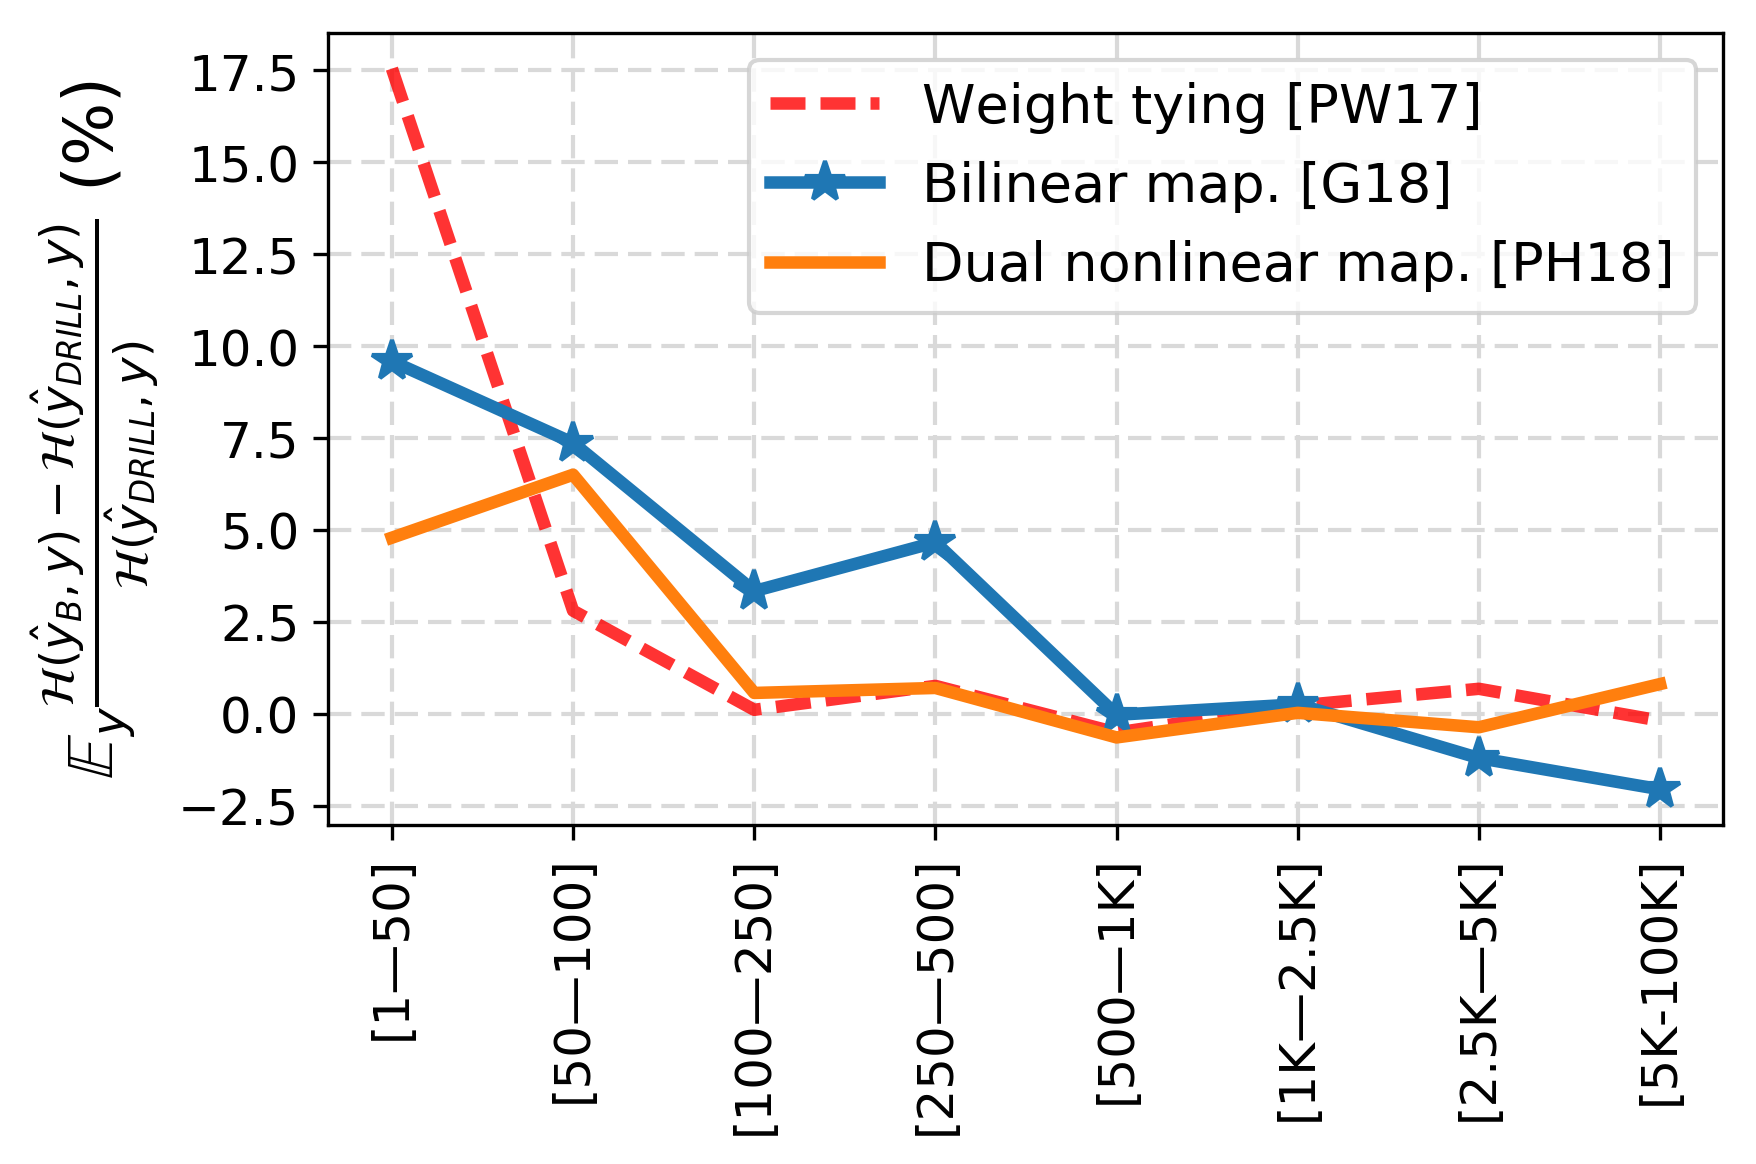

In [6]:
%matplotlib inline
from matplotlib import *
from pylab import *

def load_data(fname):
    """
        Function to load data stored in a txt file which 
        contains the output of bin_cediff.py for each 
        different method (base, bilinear, dual).
        
        e.g. python3 bin_cediff penn base > 1-base.txt
             python3 bin_cediff penn base > 2-bilinear.txt
             python3 bin_cediff penn base > 3-dual.txt 
    """
    diffs, lines = [], open(fname).readlines()
    for line in lines:
        toks = line.replace('\n','').split(' ')
        diffs.append(float(toks[0])*-1)
    return diffs

# Load cross-entropy differences wrt to ours
diffs = load_data('1-base.txt')
diffs_gu18 = load_data('2-bilinear.txt')
diffs_ph18 = load_data('3-dual.txt')

# Create figure and plot lines
figure(num=None, figsize=(6, 3.5), dpi=300, facecolor='w', edgecolor='k')
plot(diffs, '--', color='r', linewidth=3, alpha=0.8, markersize=10, label='Weight tying [PW17]')
plot(diffs_gu18, '-*',  linewidth=3, markersize=10, label='Bilinear map. [G18]')
plot(diffs_ph18, '-', linewidth=3, markersize=12, label='Dual nonlinear map. [PH18]')
grid(True, lw = 1, ls = '--', c = '.85')
legend(fontsize=13)

# Add descriptions for y and x axis
ticks = ('[1—50]', '[50—100]', '[100—250]', '[250—500]', '[500—1K]','[1K—2.5K]','[2.5K—5K]','[5K-100K]')
xticks(np.arange(len(ticks)), ticks , rotation=90, fontsize=12)
yticks(fontsize=12)
ylabel(r'$\mathbb{E}_{y} \frac{\mathcal{H}(\hat{y}_{B}, y) - \mathcal{H}(\hat{y}_{DRILL}, y)}{\mathcal{H}(\hat{y}_{DRILL},y)}$ (%)',fontsize=16)
xlabel('')

# Store image to disk
savefig('lowfreq.svg', dpi=300, format='svg',pad_inches=0.2,bbox_inches='tight')

# convert to pdf with:
# inkscape -D -z --file=lowfreq.svg --export-pdf=lowfreq.pdf --export-latex

